In [1]:
"""
Analyze daughter particles for annihilation event
author: Jiancheng Zeng
Date: July 12, 2023
"""

'\nAnalyze daughter particles for annihilation event\nauthor: Jiancheng Zeng\nDate: July 12, 2023\n'

In [2]:
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
#from toy_model_analysis import Analyze_trace, read_data_from_toymodel
import toy_model_analysis

In [3]:
file_path_1 = '/home/jiancheng/GRAMS/toymodel_work/output/2023/anti_He3_daughters_1e7.dat'
label_50cm= '140cm width'

data_3d = toy_model_analysis.read_data_from_toymodel(file_path_1)
Result = toy_model_analysis.Analyze_daughter(data_3d, -1000010020, stop_event=True, in_flight_event=False)


Reading data...

Toy Model data imported
Found 14920 Events!
[##################################################] 100.00% 14920/14920
 We got 14920 events selected
Last event is 9997986


In [4]:
print(Result.get_value(0, 0))
print("\n")
# Result vector meaning: Result.get_value([event number][0 for general info/1 for daughter detailed info])
print(Result.get_value(0, 1)[0])

[1271, 803.149, 0, 8.389278000000001, 14.9076, 6.195900000000002]


[1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35]


[11, 11, 11, 11, 11, 22, 22, 22, 22, 22, 22, -2212, -211, 211, 211, -211, 211, 221, 2112, 211, -211, 211, -211, 1000160360, 2112, 22, 22, 22]


([<matplotlib.axis.XTick at 0x7fee8a66aa40>,
 [Text(0, 0, '-211'),
  Text(1, 0, '11'),
  Text(2, 0, '22'),
  Text(3, 0, '111'),
  Text(4, 0, '211'),
  Text(5, 0, '2112'),
  Text(6, 0, '2212'),
  Text(7, 0, '1000150310')])

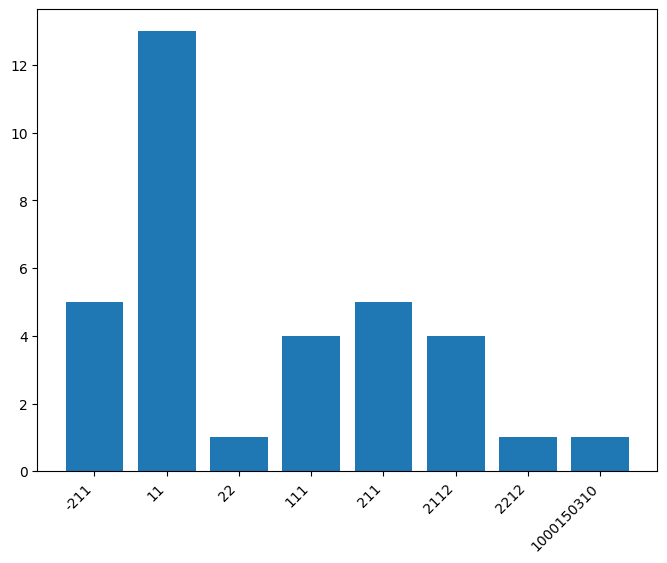

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

print(Result.get_value(0, 1)[1])

# Count the occurrences of each unique element
unique_elements, element_counts = np.unique(Result.get_value(2, 1)[1], return_counts=True)

# Create an evenly spaced range of numbers for the x-axis
x_values = np.arange(len(unique_elements))

# Create the bar plot
plt.bar(x_values, element_counts)

# Set the x-ticks and labels
plt.xticks(x_values, unique_elements, rotation=45, ha='right')

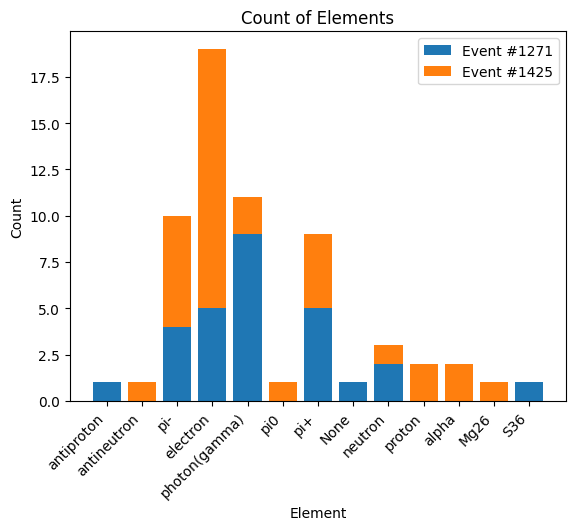

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Obtain the unique elements from both original and additional data
unique_elements = np.unique(np.concatenate((Result.get_value(0, 1)[1] , Result.get_value(1, 1)[1] )))

# Count the occurrences of each unique element in the original data
original_element_counts = np.zeros_like(unique_elements)
for i, elem in enumerate(unique_elements):
    original_element_counts[i] = np.count_nonzero(Result.get_value(0, 1)[1]  == elem)

# Count the occurrences of each unique element in the additional data
additional_element_counts = np.zeros_like(unique_elements)
for i, elem in enumerate(unique_elements):
    additional_element_counts[i] = np.count_nonzero(Result.get_value(1, 1)[1]  == elem)

# Create an evenly spaced range of numbers for the x-axis
x_values = np.arange(len(unique_elements))

# Create the original bar plot
plt.bar(x_values, original_element_counts, label='Event #'+str(Result.get_value(0, 0)[0]))

# Create the bar plot for the additional data on top of the original data
plt.bar(x_values, additional_element_counts, bottom=original_element_counts, label='Event #'+str(Result.get_value(1, 0)[0]))

# Apply the function to the array of particle IDs using np.vectorize()
x_name = np.vectorize(toy_model_analysis.name_of_particle)(unique_elements)

# Set the x-ticks and labels
plt.xticks(x_values, x_name, rotation=45, ha='right')

# Add labels and title
plt.xlabel('Element')
plt.ylabel('Count')
plt.title('Count of Elements')

# Add legend
plt.legend()

# Show the plot
plt.show()



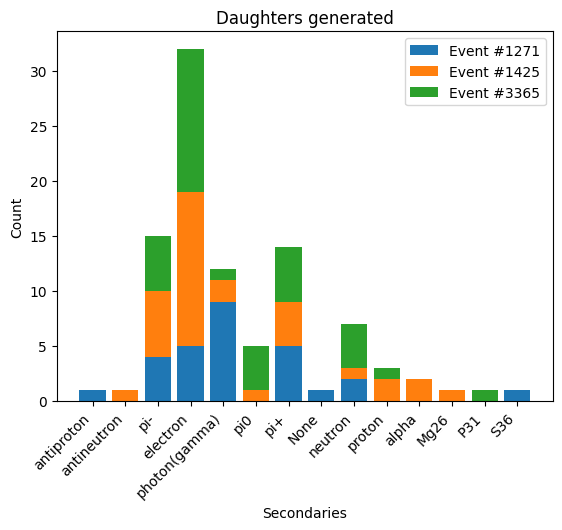

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_datasets(datasets):
    # Obtain the unique elements from all datasets
    unique_elements = np.unique(np.concatenate([data[1] for data in datasets]))

    # Initialize counts for each dataset
    dataset_counts = []
    for data in datasets:
        counts = np.zeros_like(unique_elements)
        for i, elem in enumerate(unique_elements):
            counts[i] = np.count_nonzero(data[1] == elem)
        dataset_counts.append(counts)

    # Create an evenly spaced range of numbers for the x-axis
    x_values = np.arange(len(unique_elements))

    # Plot the data for each dataset
    for i, counts in enumerate(dataset_counts):
        label = 'Event #' + str(Result.get_value(i, 0)[0])
        if i == 0:
            plt.bar(x_values, counts, label=label)
        else:
            plt.bar(x_values, counts, bottom=np.sum(dataset_counts[:i], axis=0), label=label)

    # Apply the function to the array of particle IDs using np.vectorize()
    x_name = np.vectorize(toy_model_analysis.name_of_particle)(unique_elements)

    # Set the x-ticks and labels
    plt.xticks(x_values, x_name, rotation=45, ha='right')

    # Add labels and title
    plt.xlabel('Secondaries')
    plt.ylabel('Count')
    plt.title('Daughters generated')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


datasets = []
for i in range(3):
    datasets.append([i, Result.get_value(i, 1)[1]])


plot_multiple_datasets(datasets)
